# Ridge and Lasso , Elasticnet Reegularisation

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [13]:
# Loading pre-defined Boston Dataset
import seaborn as sns
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
  
# PLACE THE IRIS DATA IN A PANDAS DATAFRAME

df = pd.DataFrame(data=diabetes_data.data,columns=diabetes_data.feature_names)

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


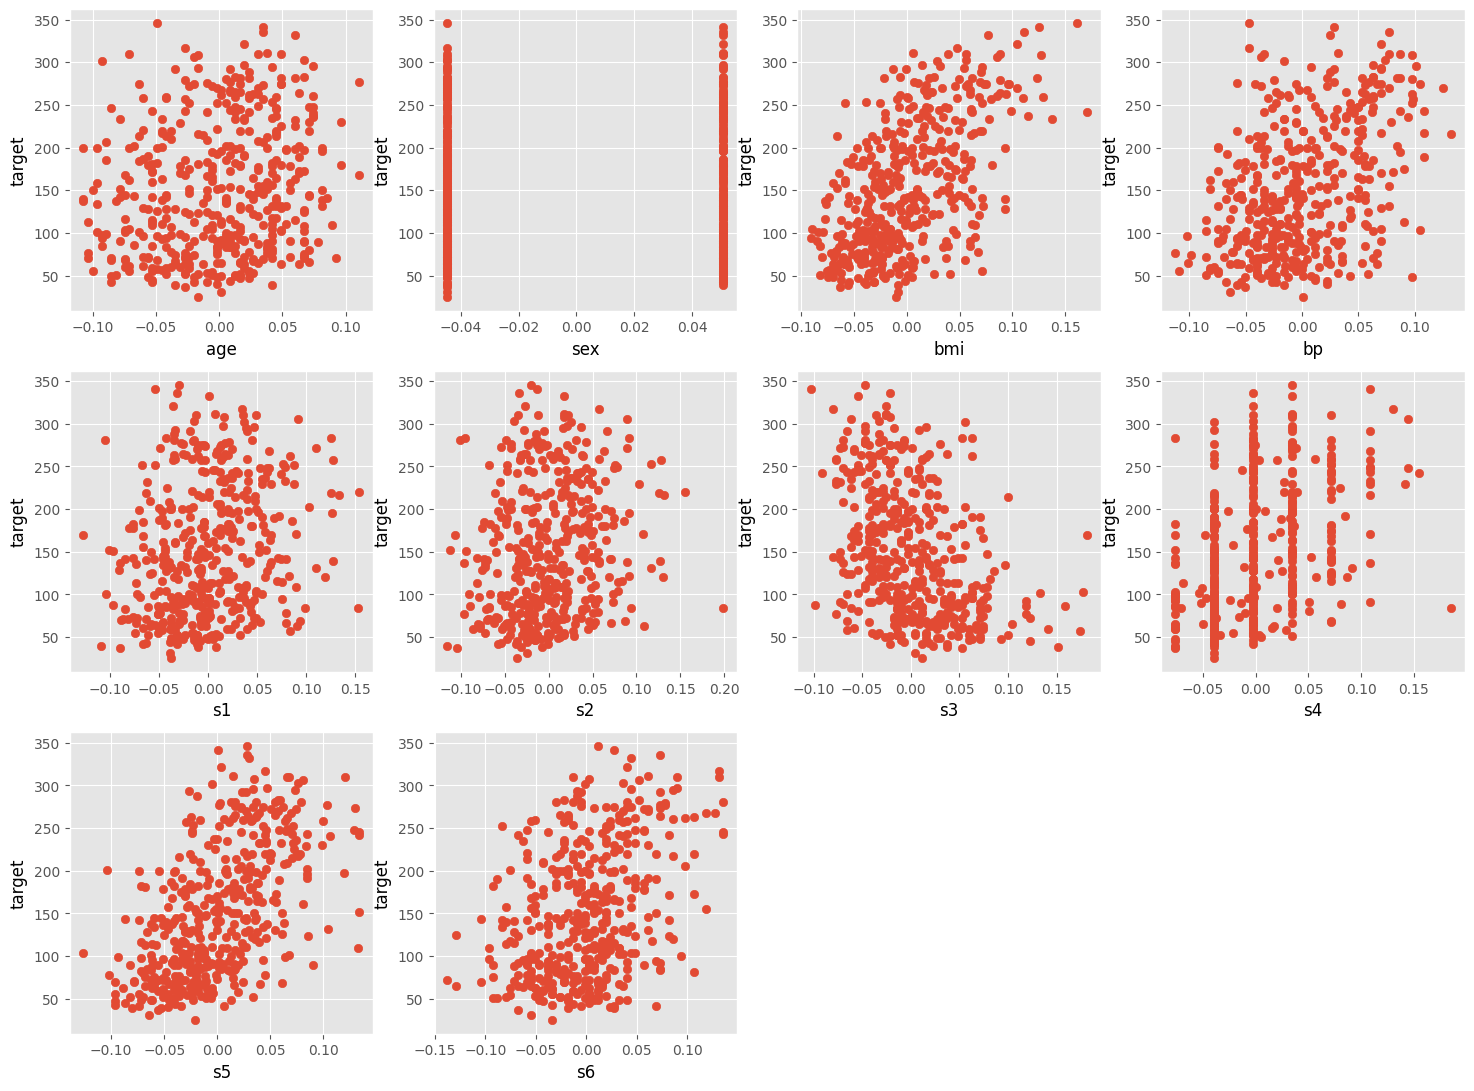

In [14]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(diabetes_data.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(diabetes_data.data[:, index], diabetes_data.target)
	ax.set_ylabel('target', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()


In [15]:
# Load the dataset into Pandas Dataframe
diabetes_pd = pd.DataFrame(diabetes_data.data)
diabetes_pd.columns = diabetes_data.feature_names
diabetes_pd_target = np.asarray(diabetes_data.target)
diabetes_pd['target'] = pd.Series(diabetes_pd_target)

# input
X = diabetes_pd.iloc[:, :-1]

#output
Y = diabetes_pd.iloc[:, -1]

print(diabetes_pd.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


Now, we apply train-test split to divide the dataset into two parts, one for training and another for testing. We will be using 25% of the data for testing. 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
	diabetes_pd.iloc[:, :-1], diabetes_pd.iloc[:, -1],
	test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))


Train data shape of X = (331, 10) and Y = (331,) : 
Test data shape of X = (111, 10) and Y = (111,) : 


In [17]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean squared Error on test set :  2285.271053489593
  Columns  Coefficient Estimate
0     age            -30.902305
1     sex           -244.212806
2     bmi            521.882770
3      bp            338.529452
4      s1           -770.074639
5      s2            479.387011
6      s3             77.517878
7      s4             91.151005
8      s5            742.683612
9      s6             85.795051


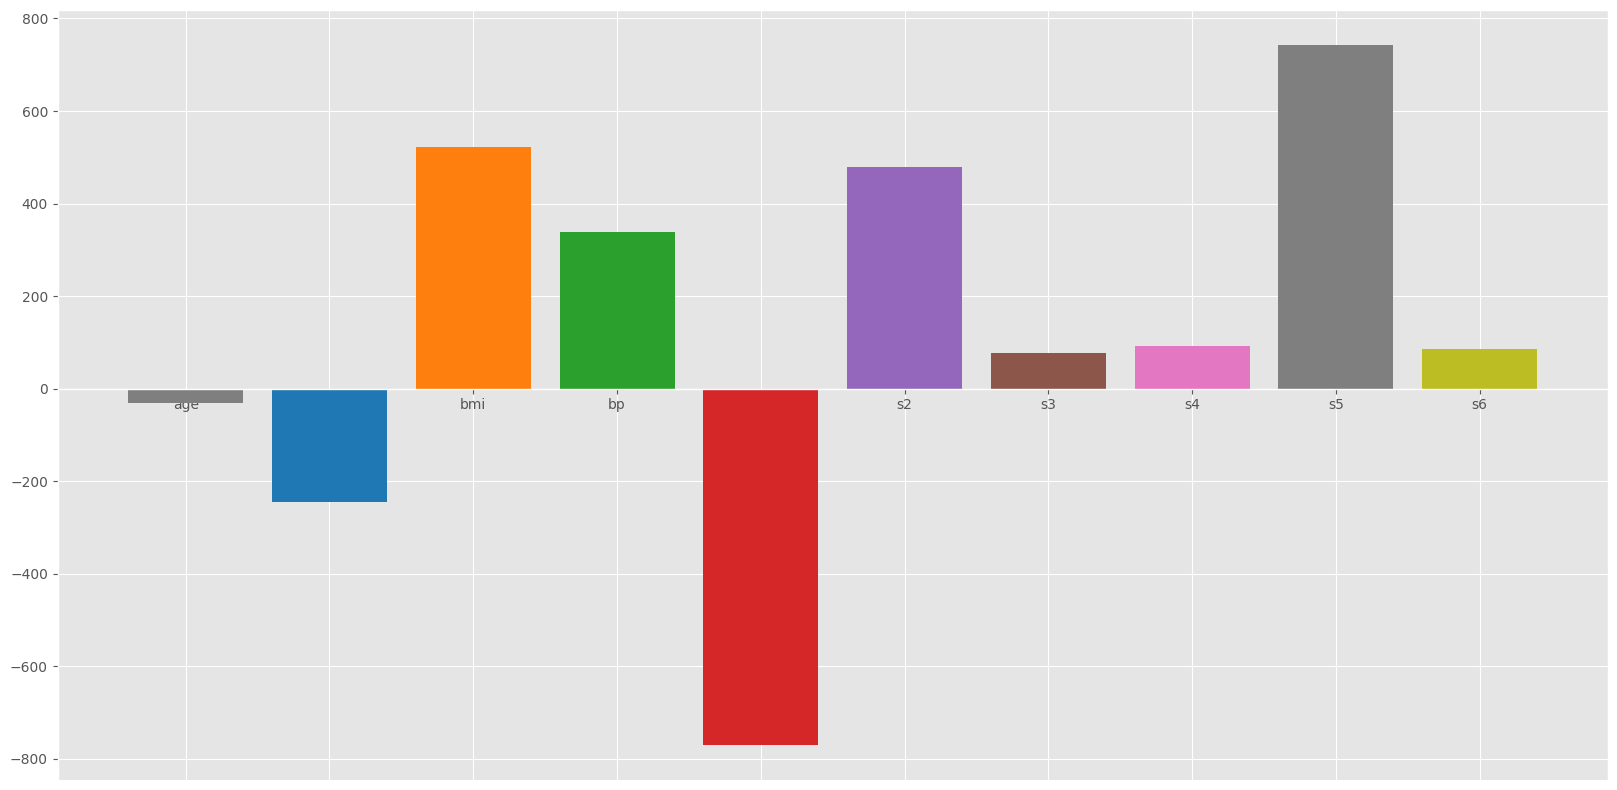

In [18]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


In [19]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

# Output: The value of MSE error and the dataframe with ridge coefficients.

2878.432664560891
  Columns  Coefficient Estimate
0     age             22.852106
1     sex            -66.287856
2     bmi            267.561354
3      bp            180.011610
4      s1              6.371727
5      s2            -24.882681
6      s3           -140.260708
7      s4             96.267497
8      s5            230.526974
9      s6            116.458979
